In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.stats import sem, linregress
from pprint import pprint
#pd.options.display.float_format = '{0:,.2f}'.format

In [3]:
# Read the processed DataFrame:

offense_and_water_access = pd.read_csv('../1_Input/Water_access_and_offense_count.csv', encoding='utf-8')
offense_and_water_access = offense_and_water_access.groupby(['State','Year']).sum()
offense_and_water_access.head()

Water Access per Capita  Offense Count
State Year                                        
CO    1999                 1.481490           6683
      2000                 1.388775           7111
      2001                 1.357764           7368
      2002                 1.338213           8167
      2003                 1.326888           8438

68.02853870988545
0.5336437933466432


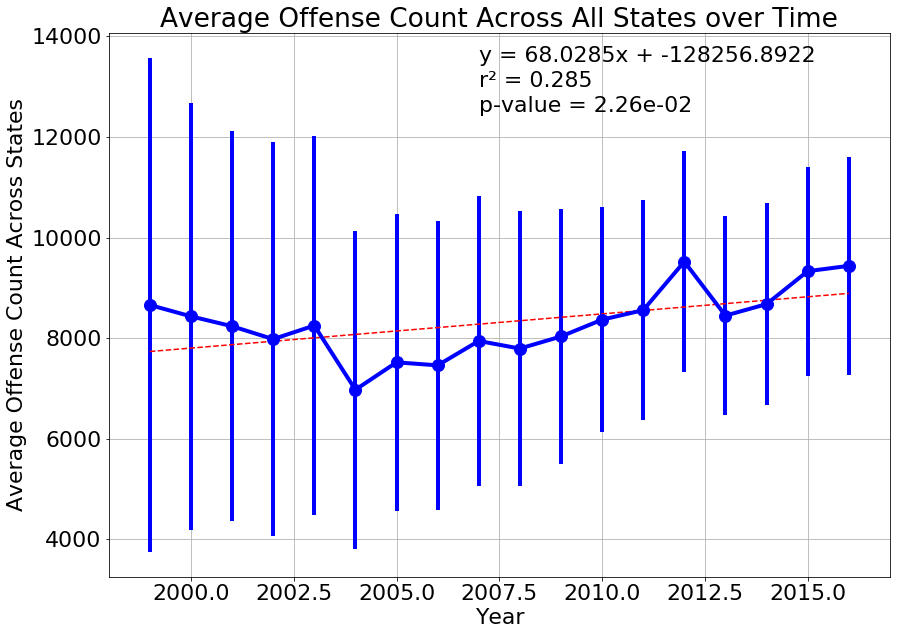

In [7]:
offense_and_water_access_year_mean = offense_and_water_access.groupby('Year').mean()
offense_and_water_access_year_sem = offense_and_water_access.groupby('Year').sem()

year_labels = [str(offense_and_water_access_year_mean.reset_index()['Year'][i]) for i in np.arange(offense_and_water_access_year_mean.shape[0])]
plt.errorbar(offense_and_water_access_year_mean.index, offense_and_water_access_year_mean['Offense Count'],
             yerr=offense_and_water_access_year_sem['Offense Count'], label=year_labels,
             marker='o', linewidth=4, markersize=12, 
             linestyle='solid', color='blue', alpha=1)

# Adding a trendline
x=offense_and_water_access_year_mean.index
y=offense_and_water_access_year_mean['Offense Count']
slope, _, r_value, p_value, _ = linregress(x,y)
print(slope)
print(r_value)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
plt.text(2007, 13500, f"y = {z[0]:.4f}x + {z[1]:.4f}")
plt.text(2007, 13000, f"r\N{SUPERSCRIPT TWO} = {r_value**2:.3f}")
plt.text(2007, 12500, f"p-value = {p_value:.2e}")

plt.title('Average Offense Count Across All States over Time')
plt.xlabel('Year')
plt.axis(xmin=1998, xmax=2017)
plt.ylabel('Average Offense Count Across States')
plt.grid()
plt.gcf().set_size_inches(14, 10)
plt.rcParams.update({'font.size': 22})
plt.savefig("../6_Output/Average_USA_offense_count_per_year_NP.png", bbox_inches='tight')
plt.show()

-0.007374130950814041
-0.8374865906258679


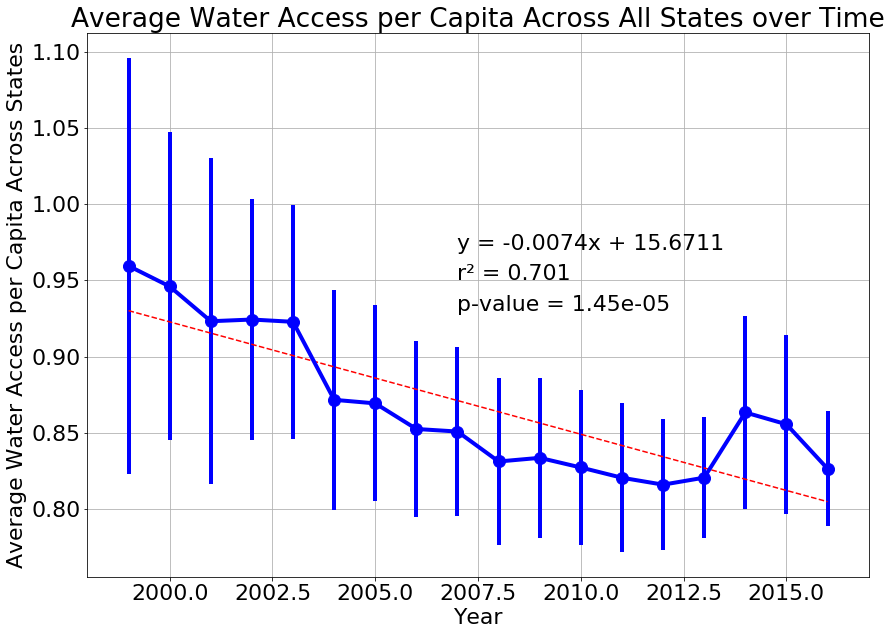

In [79]:
year_labels = [str(offense_and_water_access_year_mean.reset_index()['Year'][i]) for i in np.arange(offense_and_water_access_year_mean.shape[0])]
plt.errorbar(offense_and_water_access_year_mean.index, offense_and_water_access_year_mean['Water Access per Capita'],
             yerr=offense_and_water_access_year_sem['Water Access per Capita'], label=year_labels,
             marker='o', linewidth=4, markersize=12, 
             linestyle='solid', color='blue', alpha=1)

# Adding a trendline
x=offense_and_water_access_year_mean.index
y=offense_and_water_access_year_mean['Water Access per Capita']
slope, _, r_value, p_value, _ = linregress(x,y)
print(slope)
print(r_value)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
plt.text(2007, 0.97, f"y = {z[0]:.4f}x + {z[1]:.4f}")
plt.text(2007, 0.95, f"r\N{SUPERSCRIPT TWO} = {r_value**2:.3f}")
plt.text(2007, 0.93, f"p-value = {p_value:.2e}")

plt.title('Average Water Access per Capita Across All States over Time')
plt.xlabel('Year')
plt.axis(xmin=1998, xmax=2017)
plt.ylabel('Average Water Access per Capita Across States')
plt.grid()
plt.gcf().set_size_inches(14, 10)
plt.rcParams.update({'font.size': 22})
plt.savefig("../6_Output/Average_USA_water_access_per_year_NP.png", bbox_inches='tight')
plt.show()